# 

In [1]:
from config import *
from util import *

In [2]:
logdir=logdir+'/picks'

system='H4'
name=system
opt=''

runs=getruns(logdir)
runs=filter_paths(runs,'.*'+system+'.*'+opt+'.*')
runs=sortruns(runs)
ref=reference_energies[system]-.0001
printnotes(runs)

H4_kfac_0.005 (reloaded from /global/scratch/users/nilin/warm_starts_10_12/H4/checkpoints/150.npz, new optimizer state)
H4_kfac_0.01 (reloaded from /global/scratch/users/nilin/warm_starts_10_12/H4/checkpoints/150.npz, new optimizer state)
H4_kfac_0.02 (reloaded from /global/scratch/users/nilin/warm_starts_10_12/H4/checkpoints/150.npz, new optimizer state)
H4_kfac_0.05 (reloaded from /global/scratch/users/nilin/warm_starts_10_12/H4/checkpoints/150.npz, new optimizer state)
H4_kfac_0.1 (reloaded from /global/scratch/users/nilin/warm_starts_10_12/H4/checkpoints/150.npz, new optimizer state)
H4_kfac_0.2 (reloaded from /global/scratch/users/nilin/warm_starts_10_12/H4/checkpoints/150.npz, new optimizer state)
H4_minsr_0.005 (reloaded from /global/scratch/users/nilin/warm_starts_10_12/H4/checkpoints/150.npz, new optimizer state)
H4_minsr_0.01 (reloaded from /global/scratch/users/nilin/warm_starts_10_12/H4/checkpoints/150.npz, new optimizer state)
H4_minsr_0.02 (reloaded from /global/scratch/u

In [3]:
bestruns=[]

for opt in ['kfac','minsr','proxsr']:
    optruns=list(filter_paths(runs,'.*'+opt+'.*').keys())
    finalenergies=[getevalenergy(r) for r in optruns]
    bestruns.append(optruns[np.argmin(finalenergies)])

bestruns={r:runs[r] for r in bestruns}
for b,n in bestruns.items():
    print(b)
    print(n)
    print()

/Users/nilin2/Desktop/brc/vmc/data/picks/H4_150/kfac_0.2
H4_kfac_0.2 (reloaded from /global/scratch/users/nilin/warm_starts_10_12/H4/checkpoints/150.npz, new optimizer state)

/Users/nilin2/Desktop/brc/vmc/data/picks/H4_150/minsr_1.0
H4_minsr_1.0 (reloaded from /global/scratch/users/nilin/warm_starts_10_12/H4/checkpoints/150.npz, new optimizer state)

/Users/nilin2/Desktop/brc/vmc/data/picks/H4_150/proxsr_0.1
H4_proxsr_0.1 (reloaded from /global/scratch/users/nilin/warm_starts_10_12/H4/checkpoints/150.npz, new optimizer state)



/Users/nilin2/Library/CloudStorage/GoogleDrive-nilin@berkeley.edu/My Drive/vmcdata/plots/energy_train_H4.pdf


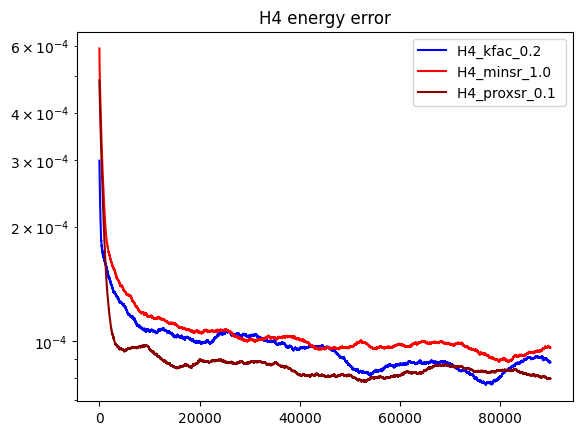

In [4]:
plotruns(logdir,bestruns,ref,5000,cleannote=lambda s:s.split('(')[0])
plt.title(name+' energy error')
plt.legend()
plt.yscale('log')
savefig(plotdir,"energy_train_"+name)